<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

# Final Project KASDD
## Kelompok Kasded Sukses Sejahtera
Anggota:

Adrian Ardizza - 2006524896 - KASDD D

Fransisco William Sudianto - 2006596535 - KASDD D

M Abdurahman Basyah - 2006597241 - KASDD A

Muhammad Fadhlan - 1806205060 - KASDD F


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import NearMiss
from numpy import where
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import pointbiserialr

## Section 1: Exploratory Data Analysis

### Initial Dataset Loading

In [4]:
kos = pd.read_csv('rumah_kos.csv')
kos

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8,jarak_poi_1,jarak_poi_2,jarak_poi_3,luas_kamar,harga_bulanan,banyak_kamar,banyak_pencarian_kos,gender
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9459.0,15769.0,7131.0,35.0,700000.0,4.0,4,campur
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,9740.0,409.0,10582.0,9.0,2000000.0,6.0,3,campur
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1095.0,9261.0,2053.0,12.0,545000.0,1.0,14,putri
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,3955.0,7319.0,3675.0,9.0,500000.0,5.0,62,putri
4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,6672.0,15763.0,7996.0,9.0,1500000.0,20.0,22,putri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3288,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3737.0,13349.0,5021.0,9.0,700000.0,5.0,16,putri
3289,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2625.0,9410.0,1507.0,12.0,300000.0,26.0,104,putri
3290,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,7350.0,NaN,8176.0,9.0,675000.0,7.0,3,putra
3291,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4745.0,14483.0,3764.0,12.0,600000.0,16.0,79,putra


### Dataset Characteristics

#### Shape

In [6]:
kos.shape

(3293, 16)

The given dataset has dimensions of 3293 rows and 16 columns. In this dataset, 7 features are numerical features, 1 feature (gender) is a categorical feature, and the 8 remaining features are binary features with possible values of 0 or 1.

### Information

In [7]:
kos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3293 entries, 0 to 3292
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fasilitas_1           3230 non-null   float64
 1   fasilitas_2           3219 non-null   float64
 2   fasilitas_3           3231 non-null   float64
 3   fasilitas_4           3222 non-null   float64
 4   fasilitas_5           3221 non-null   float64
 5   fasilitas_6           3229 non-null   float64
 6   fasilitas_7           3215 non-null   float64
 7   fasilitas_8           3225 non-null   float64
 8   jarak_poi_1           3226 non-null   float64
 9   jarak_poi_2           3226 non-null   float64
 10  jarak_poi_3           3207 non-null   float64
 11  luas_kamar            3225 non-null   float64
 12  harga_bulanan         3208 non-null   float64
 13  banyak_kamar          3223 non-null   float64
 14  banyak_pencarian_kos  3293 non-null   int64  
 15  gender               

In [8]:
kos.describe()

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8,jarak_poi_1,jarak_poi_2,jarak_poi_3,luas_kamar,harga_bulanan,banyak_kamar,banyak_pencarian_kos
count,3230.000000,3219.000000,3231.000000,3222.000000,3221.000000,3229.000000,3215.000000,3225.000000,3226.000000,3226.000000,3207.000000,3225.000000,3.208000e+03,3223.000000,3293.000000
mean,0.261610,0.608263,0.456515,0.562384,0.641416,0.427687,0.004666,0.518450,4679.478921,9920.515189,4906.215778,12.143745,8.975029e+05,10.506050,35.362587
std,0.439579,0.488214,0.498183,0.496170,0.479659,0.494820,0.068156,0.499737,3569.137245,4714.800696,3617.408043,4.951679,6.501208e+05,9.565184,47.269615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,519.000000,168.000000,324.000000,6.000000,1.550000e+05,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2355.500000,7875.750000,2693.000000,9.000000,5.000000e+05,4.000000,8.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3961.000000,9241.000000,3927.000000,12.000000,6.500000e+05,8.000000,20.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,5900.750000,12422.750000,6099.000000,12.250000,1.200000e+06,14.000000,44.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48675.000000,55105.000000,46517.000000,48.000000,5.000000e+06,121.000000,769.000000


### Correlations

#### Numerical Feature Correlation

<AxesSubplot: >

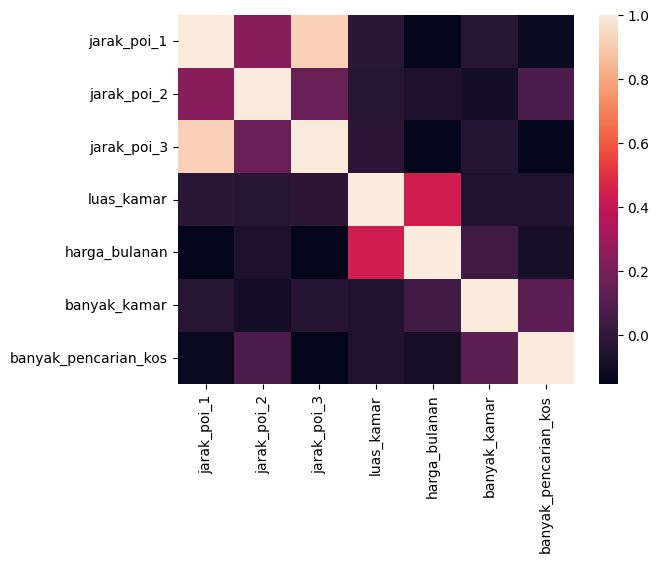

In [13]:
sns.heatmap(kos[["jarak_poi_1", "jarak_poi_2", "jarak_poi_3", "luas_kamar", "harga_bulanan", "banyak_kamar", "banyak_pencarian_kos"]].corr())

#### Correlation of Facilities to Monthly Price
We use the point biserial method of correlation here to handle finding the correlation between discrete and numerical features.

In [16]:
categorical = kos.drop(["jarak_poi_1", "jarak_poi_2", "jarak_poi_3", "luas_kamar", "banyak_kamar", "banyak_pencarian_kos", "harga_bulanan", "gender"], axis=1)
categorical

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
3288,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3289,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
3290,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3291,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot: >

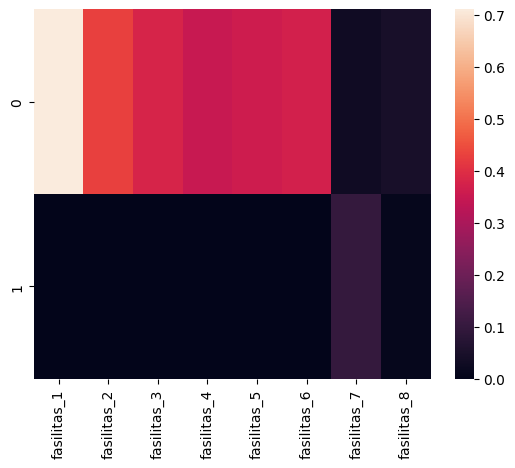

In [31]:
sns.heatmap(categorical.corrwith(kos['harga_bulanan'].astype('float'), method=pointbiserialr))

#### Pairplot of Dataset Features

#### Numerical Features

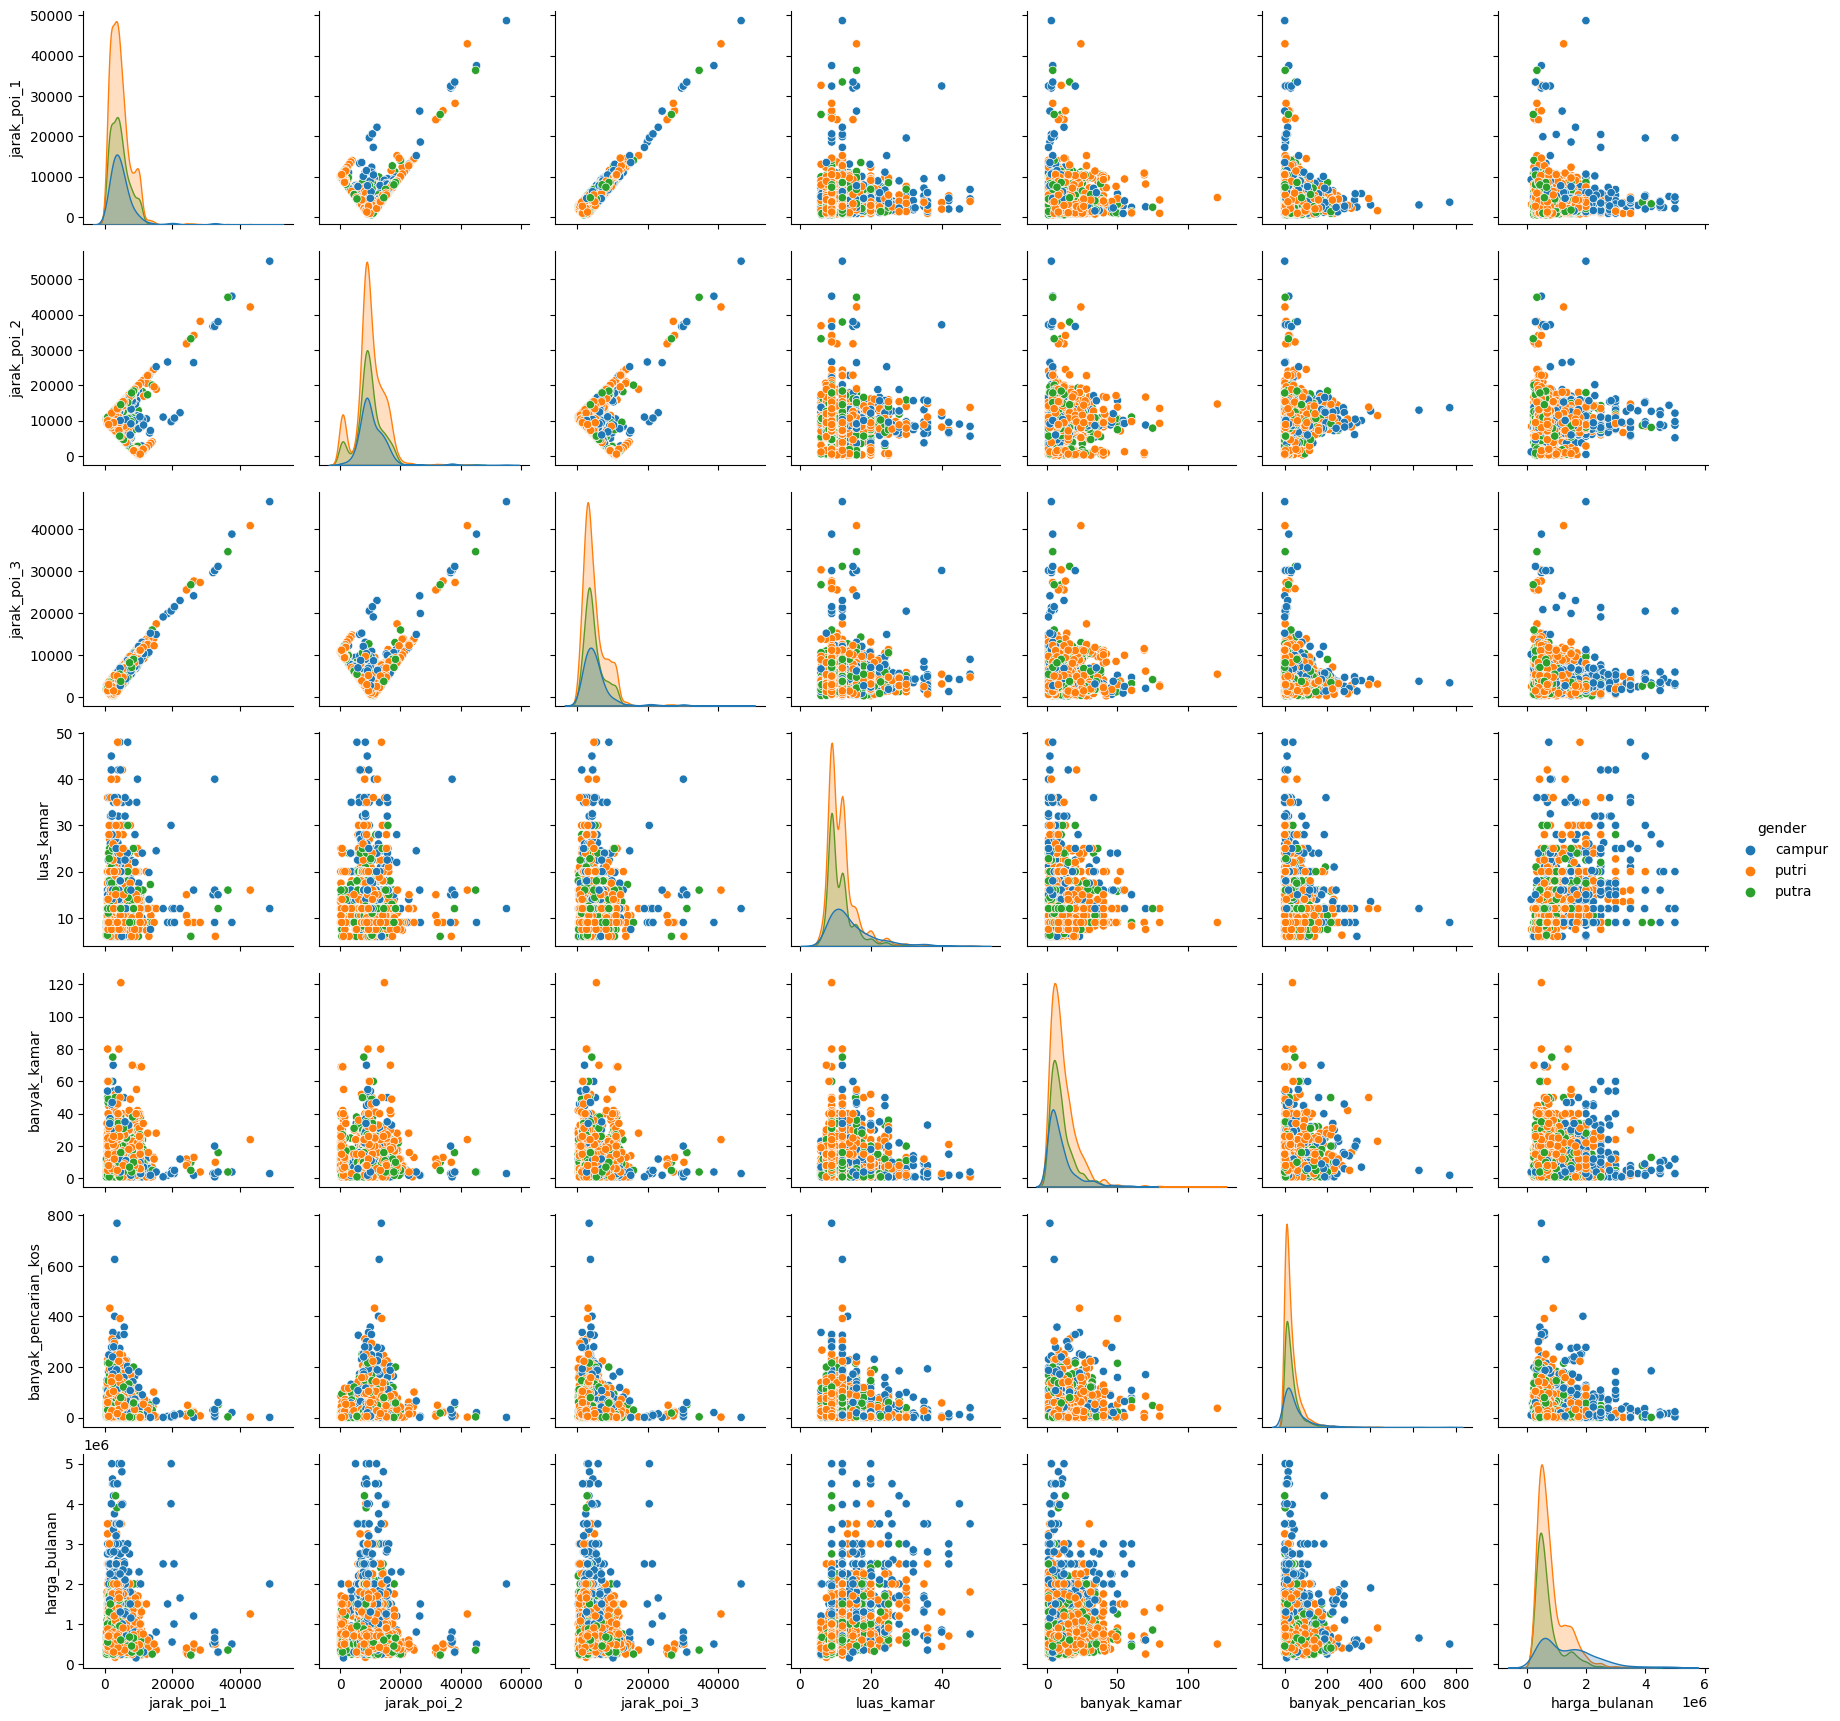

In [53]:
sns.pairplot(data=kos[["jarak_poi_1", "jarak_poi_2", "jarak_poi_3", "luas_kamar", "banyak_kamar", "banyak_pencarian_kos", "harga_bulanan", "gender"]], hue="gender")

#### Exploration

##### Facilities with Monthly Price

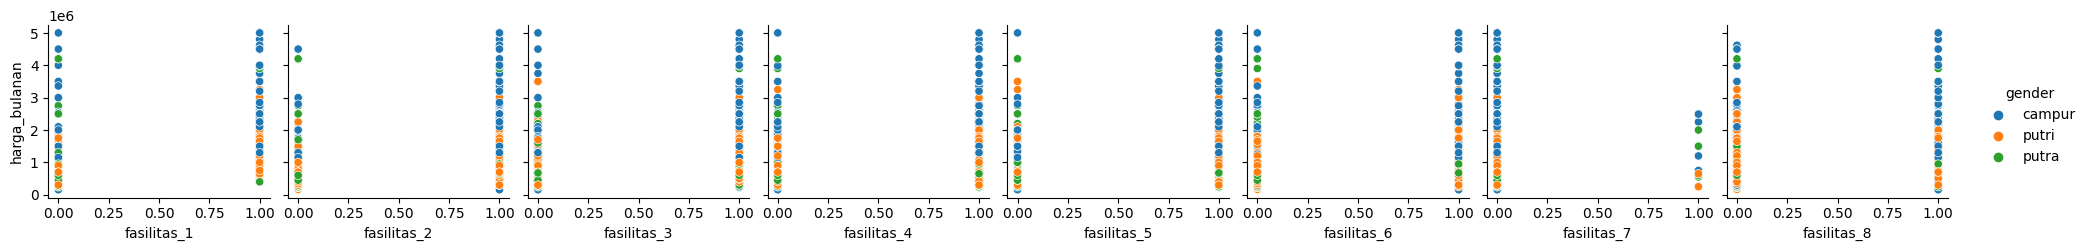

In [51]:
sns.pairplot(data=kos, y_vars=['harga_bulanan'], x_vars=[f'fasilitas_{i}' for i in range(1, 9)], hue='gender')

Secara individu, sebuah fasilitas tidak begitu berpengaruh terhadap pola harga bulanan karena pada sebagian besar kosan, terdapat lebih dari 1 fasilitas yang berkontribusi terhadap harganya. Sehingga pada tahap selanjutnya kita harus mempelajari hubungan antara keberadaan **beberapa** fasilitas pada suatu kos terhadap harga sewa-nya.

#### Correlation between Sets of Facilities to Gender

##### Kos Putri

In [87]:
female_kos = kos[kos["gender"] == "putri"].dropna()
female_kos

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8,jarak_poi_1,jarak_poi_2,jarak_poi_3,luas_kamar,harga_bulanan,banyak_kamar,banyak_pencarian_kos,gender,gender_encoded
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1095.0,9261.0,2053.0,12.0,545000.0,1.0,14,putri,2
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,3955.0,7319.0,3675.0,9.0,500000.0,5.0,62,putri,2
4,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,6672.0,15763.0,7996.0,9.0,1500000.0,20.0,22,putri,2
6,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,14043.0,23969.0,13225.0,12.0,400000.0,1.0,17,putri,2
9,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,4796.0,12331.0,2467.0,13.5,1300000.0,5.0,41,putri,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8840.0,18825.0,8225.0,7.5,400000.0,8.0,32,putri,2
3287,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5430.0,15345.0,4755.0,25.0,900000.0,8.0,3,putri,2
3288,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3737.0,13349.0,5021.0,9.0,700000.0,5.0,16,putri,2
3289,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2625.0,9410.0,1507.0,12.0,300000.0,26.0,104,putri,2


In [88]:
female_kos[[f"fasilitas_{i}" for i in range(1, 9)]].mode()

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


Apabila kita melakukan filter terhadap semua kos putri yang ada pada dataset, maka terlihat bahwa sebagian besar kos putri memiliki fasilitas_2 sampai dengan fasilitas_5 terpenuhi berdasarkan modus dari setiap fasilitas yang ada. Untuk mendapatkan gambaran yang lebih lengkap mengenai hal tersebut, maka kita dapat menghitung persentase kos yang memiliki fitur-fitur tersebut.

In [89]:
count = {}
for i in range(1, 9):
    percent = (len(female_kos[female_kos[f"fasilitas_{i}"]== 1]) / len(female_kos)) * 100
    count[f"fasilitas_{i}"] = f"{percent:.2f}%"

pd.DataFrame(count, index=["Overall"])

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8
Overall,25.39%,62.34%,50.62%,64.14%,70.70%,39.61%,0.31%,47.34%


Berdasarkan perhitungan yang telah dilakukan diatas, terlihat bahwa fasilitas 2, 3, 4, 5 muncul di setidaknya 60% dari kos putri yang ada, fasilitas 8 pada 47% dari semua kos putri, fasilitas 6 pada 36% dari seluruh kos putri, fasilitas 1 ada pada 25% dari kos putri, dan fasilitas 7 tidak ada di hampir semua kos putri.

##### Kos Putra

In [83]:
male_kos = kos[kos["gender"] == "putra"].dropna()
male_kos

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8,jarak_poi_1,jarak_poi_2,jarak_poi_3,luas_kamar,harga_bulanan,banyak_kamar,banyak_pencarian_kos,gender,gender_encoded
8,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,3821.0,8979.0,2539.0,9.0,850000.0,20.0,18,putra,1
12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1694.0,8378.0,3365.0,12.0,700000.0,12.0,34,putra,1
30,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2780.0,8159.0,4874.0,9.0,1000000.0,3.0,18,putra,1
33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4210.0,9901.0,2390.0,9.0,500000.0,9.0,5,putra,1
41,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,749.0,9676.0,1883.0,9.0,500000.0,10.0,6,putra,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2176.0,8682.0,4353.0,9.0,400000.0,5.0,46,putra,1
3249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6826.0,15092.0,4751.0,16.0,450000.0,4.0,4,putra,1
3263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,914.0,10963.0,2330.0,12.0,550000.0,8.0,30,putra,1
3278,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,4449.0,5599.0,5464.0,18.0,950000.0,1.0,5,putra,1


In [84]:
male_kos[[f"fasilitas_{i}" for i in range(1, 9)]].mode()

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Berbeda dengan kos putri, pada umumnya kos putra hanya memiliki fasilitas 5, dan 8, dengan sebagian besar fasilitas yang lain-nya tidak ada pada sebagian besar kos putra. Persentase keberadaan fasilitas pada kos putra dapat dilihat sebagai berikut:

In [85]:
count = {}
for i in range(1, 9):
    percent = (len(male_kos[male_kos[f"fasilitas_{i}"]== 1]) / len(male_kos)) * 100
    count[f"fasilitas_{i}"] = f"{percent:.2f}%"

pd.DataFrame(count, index=["Overall"])

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8
Overall,15.06%,48.49%,38.88%,43.04%,51.65%,33.72%,0.72%,57.10%


Berdasarkan perhitungan diatas, terlihat bahwa sebagian besar kos pria memiliki fasilitas_5 dan fasilitas_8, dengan beberapa fasilitas lain seperti fasilitas_2 dan fasilitas_4 dimiliki oleh setidaknya 42% dari kos pria. Lalu setidaknya 33% kos pria memiliki fasilitas_3 dan fasilitas_6.

Menariknya, sama seperti pada kos putri, jumlah kos putra yang memiliki fasilitas_7 sangat sedikit (hanya 0.63%). Hal ini menunjukkan bahwa keberdaan fasilitas_7 tidak begitu dipengaruhi oleh tipe gender dari kosan

##### Kos Putra

In [90]:
mixed_kos = kos[kos["gender"] == "campur"].dropna()
mixed_kos

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8,jarak_poi_1,jarak_poi_2,jarak_poi_3,luas_kamar,harga_bulanan,banyak_kamar,banyak_pencarian_kos,gender,gender_encoded
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9459.0,15769.0,7131.0,35.0,700000.0,4.0,4,campur,0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,9740.0,409.0,10582.0,9.0,2000000.0,6.0,3,campur,0
5,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,5651.0,10730.0,3598.0,12.0,1500000.0,6.0,9,campur,0
22,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2063.0,9207.0,1626.0,12.0,600000.0,4.0,29,campur,0
25,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,9640.0,900.0,10253.0,9.0,750000.0,10.0,25,campur,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3255,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,4543.0,9367.0,6863.0,9.0,2250000.0,12.0,42,campur,0
3256,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1489.0,8566.0,3146.0,12.0,1600000.0,34.0,34,campur,0
3266,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6259.0,10288.0,4367.0,12.0,700000.0,11.0,10,campur,0
3272,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,7732.0,9083.0,6247.0,16.0,1150000.0,2.0,19,campur,0


In [91]:
mixed_kos[[f"fasilitas_{i}" for i in range(1, 9)]].mode()

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0


Pada umumnya kos campur pada dataset memiliki fasilitas_2, fasilitas_4, fasilitas_5, fasilitas_6, dan fasilitas_8. Hal ini sepertinya merupakan sebuah overlap antara fasilitas-fasilitas yang paling sering muncul pada kos putra dengan yang paling sering muncul di kos putri.

In [92]:
count = {}
for i in range(1, 9):
    percent = (len(mixed_kos[mixed_kos[f"fasilitas_{i}"]== 1]) / len(mixed_kos)) * 100
    count[f"fasilitas_{i}"] = f"{percent:.2f}%"

pd.DataFrame(count, index=["Overall"])

,fasilitas_1,fasilitas_2,fasilitas_3,fasilitas_4,fasilitas_5,fasilitas_6,fasilitas_7,fasilitas_8
Overall,44.92%,75.62%,44.70%,55.30%,68.62%,62.75%,0.90%,55.30%
